In [ ]:
!pip install -q -U kaggle_environments

     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 


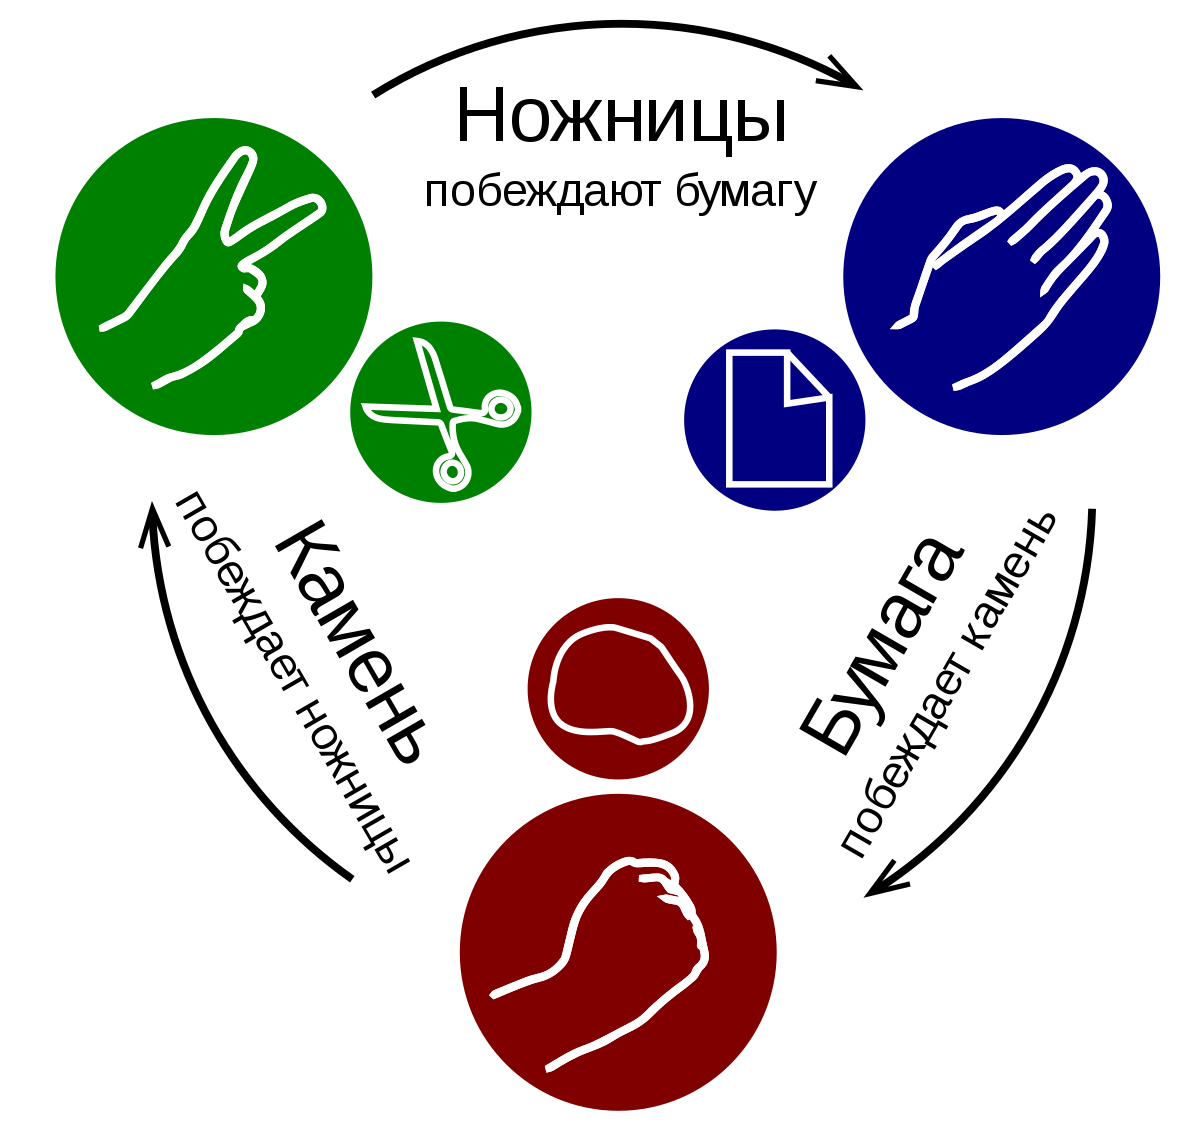

детальное описание входящих значений доступно по ссылке

https://github.com/Kaggle/kaggle-environments/tree/master/kaggle_environments/envs/rps

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

# Бумажный бот

In [ ]:
%%writefile paper_opponent.py
import random
# Paper bot
def your_agent(observation, configuration):
    return 0

Writing paper_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["paper_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-98.0, 98.0]]

# Каменный бот

In [ ]:
%%writefile rock_opponent.py
import random
# Rock bot
def your_agent(observation, configuration):
    return 1

Writing rock_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["paper_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-98.0, 98.0]]

# Ножницы бот

In [ ]:
%%writefile scissors_opponent.py
import random
# Rock bot
def your_agent(observation, configuration):
    return 2

Writing scissors_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["scissors_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-99.0, 99.0]]

# Случайный бот

In [ ]:
%%writefile random_opponent.py
import random
# Random bot
def your_agent(observation, configuration):
    return random.randrange(random.randrange(0,2), 3)

Writing random_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["random_opponent.py",  "paper"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

# Анти-бот
Бот, который предполагает, что будет повторение аппонентом и выбирает, то что это победит

In [ ]:
%%writefile anti_opponent.py
import random
# Example 
def your_agent(observation, configuration):
    # In case we have information about opponent last move
    if observation.step > 0:
        # We apply oposit variant for next step
        return [0,1,2][observation.lastOpponentAction-2]
    #initial step
    else:
         return random.randrange(0, configuration.signs)

Writing anti_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["anti_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[49.0, -49.0]]

# Анти-случайный бот
Бот, который предполагает, что будет повторение аппонентом или смещение вверх

In [ ]:
myList = [0,1,2]
myList.remove(random.choice(myList))
random.choice(myList)

1

In [ ]:
%%writefile rand_anti_opponent.py
import random
# Example 
def your_agent(observation, configuration):
    # In case we have information about opponent last move
    if observation.step > 0:
        # Full list for action
        for_action = [0,1,2]
        # Remove last action opponent
        for_action.remove(observation.lastOpponentAction)
        return random.choice(for_action)
    #initial step
    else:
         return random.randrange(0, configuration.signs)

Writing rand_anti_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["rand_anti_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

# Боты определенного четного шага

In [ ]:
%%writefile even_step_paper.py
import random
# Rock bot
def your_agent(observation, configuration):
    # if even step
    if not observation.step%2: return 1
    else: return random.choice([0, 2])

Writing even_step_paper.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["even_step_paper.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-22.0, 22.0]]

In [ ]:
%%writefile even_step_rock.py
import random
# Rock bot
def your_agent(observation, configuration):
    # if even step
    if not observation.step%2: return 0
    else: return random.choice([1, 2])

Writing even_step_rock.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["even_step_rock.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-21.0, 21.0]]

In [ ]:
%%writefile even_step_scissors.py
import random
# Rock bot
def your_agent(observation, configuration):
    # if even step
    if not observation.step%2: return 2
    else: return random.choice([0, 1])

Writing even_step_scissors.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["even_step_scissors.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-22.0, 22.0]]

# Бот оппонет/антиоппонент от четности шага 

In [ ]:
%%writefile even_copy_opponent.py
import random
# Example 
def your_agent(observation, configuration):
    # In case we have information about opponent last move
    if observation.step > 0:
        # if even step
        if not observation.step%2: 
            return observation.lastOpponentAction      
        # Odd step
        else:
            return [0,1,2][observation.lastOpponentAction-2]
    # Initial step
    else:
         return random.randrange(0, configuration.signs)

Writing even_copy_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["even_copy_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

In [ ]:
%%writefile even_anti_opponent.py
import random
# Example 
def your_agent(observation, configuration):
    # In case we have information about opponent last move
    if observation.step > 0:
        # If odd step 
        if not observation.step%2: 
            return observation.lastOpponentAction      
        # Not even step
        else:
            return [0,1,2][observation.lastOpponentAction-2]
    # Initial step
    else:
         return random.randrange(0, configuration.signs)

Writing even_anti_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["even_anti_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[96.0, -96.0]]

# Бот случайный_антиоппонент/антиоппонент от четности шага 

In [ ]:
%%writefile even_anti_rand_opponent.py
import random
# Example 
def your_agent(observation, configuration):
    # In case we have information about opponent last move
    if observation.step > 0:
        # If odd step 
        if not observation.step%2: 
          # Full list for action
          for_action = [0,1,2]
          # Remove last action opponent
          for_action.remove(observation.lastOpponentAction)
          return random.choice(for_action)  
        # Not even step
        else:
            return [0,1,2][observation.lastOpponentAction-2]
    # Initial step
    else:
         return random.randrange(0, configuration.signs)

Writing even_anti_rand_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["even_anti_rand_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[27.0, -27.0]]

# Бот анти-оппонент с памятью

In [ ]:
%%writefile friquent_anti_opponent.py
import random
mem_opponent = {}
# Example 
def your_agent(observation, configuration):
    global mem_opponent
    # In case we have information about opponent last move
    if observation.step > 0:
        # Add to memory type of opponents steps
        mem_opponent[observation.lastOpponentAction] = mem_opponent.get(observation.lastOpponentAction, 0)+1
        # Get current friquent step of oponent
        friq_step_opponent = sorted(mem_opponent, key=mem_opponent.get, reverse=True)[0]
        # Return anti_step
        return [0,1,2][friq_step_opponent-2]
    # Initial step
    else:
         return random.randrange(0, configuration.signs)

Writing friquent_anti_opponent.py


In [ ]:
evaluate(
    "rps", #environment to use - no need to change
    ["friquent_anti_opponent.py",  "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[0, 0]]

# Бот вероятностный анти-оппонент с памятью

In [ ]:
%%writefile probobility_anti_opponent.py
import random

mem_opponent = {}
# Example 
def your_agent(observation, configuration):
    global mem_opponent
    # In case we have information about opponent last move
    if observation.step > 0:
        # Add to memory type of opponents steps
        mem_opponent[observation.lastOpponentAction] = mem_opponent.get(observation.lastOpponentAction, 0)+1

        friq_step_opponent_sorted = sorted(mem_opponent, key=mem_opponent.get)
        prob_step_sorted = [mem_opponent[key]/observation.step for key in friq_step_opponent_sorted]

        bias = random.random()
        for i, prob in enumerate(prob_step_sorted):
          if prob > bias: break
        # Return anti_step
        return [0,1,2][friq_step_opponent_sorted[i]-2]
    # Initial step
    else:
         return random.randrange(0, configuration.signs)

Writing probobility_anti_opponent.py


# Турнир

Организован вариативный турнир между участниками
разбиение на случайные пары - если четное количество и четное к-во пар
или груговой турнир

определяется на кадом этапе

In [ ]:
def get_pairs(lst, n):
    '''
    функция разбиения списка список 
    списков по n элементов
    '''
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def round_tournirs(voriers):
    '''
    функция гругового турнира voriers
    '''
    qty_voriers = len(voriers)
    scores = [0 for _ in range(qty_voriers)]
    for x in range(qty_voriers):
      for y in range(x+1, qty_voriers):
        for z in range(PERIODS):
            res = evaluate("rps", [voriers[x], voriers[y]],
                            configuration={
                                           'episodeSteps': 50,
                                           'tieRewardThreshold':1
                                           }
                            )[0]
            if not period: results.append(res)
            else:
              scores[voriers.index(voriers[x])]+= res[0]
              scores[voriers.index(voriers[y])]+= res[1]
    sort_scores = sorted(scores)          
    voriers = [voriers[scores.index(score)] for score in sort_scores]
    return voriers[qty_voriers//2:] 


In [ ]:
voriers = ['rock',
           'paper',
           'scissors',
           'copy_opponent',
           'reactionary',
           'counter_reactionary',
           "probobility_anti_opponent.py",
           "friquent_anti_opponent.py",
           'anti_opponent.py',
           'even_anti_opponent.py',
           'even_anti_rand_opponent.py',
           'even_copy_opponent.py',
           'even_step_paper.py',
           'even_step_rock.py',
           'even_step_scissors.py',
           'paper_opponent.py',
           'rand_anti_opponent.py',
           'random_opponent.py',
           'rock_opponent.py',
           'scissors_opponent.py'
]

# периодов в парной игре
PERIODS = 5
# перемещиваем участников
random.shuffle(voriers)

qty_voriers = len(voriers)
PLAY = True
step = 1

while PLAY:
    if qty_voriers%2:
      print('Нечетное количество участников - нужен круговой турнир')
      print('______________________')
      # Собираем победителей гругового турнира функцией
      voriers = round_tournirs(voriers)

    else:
        pairs = qty_voriers//2

        if not pairs%2:
            print('Турнир пар по жребию')
            print('______________________')
            groups = list(get_pairs(voriers, 2))
            print(f'Количество турнирных пар {len(groups)}')
            results = []
            for period in range(PERIODS):
              for i, pair in enumerate(groups):
                #print(pair)
                res = evaluate(
                "rps", #environment to use - no need to change
                pair, #agents to evaluate
                configuration={
                              'episodeSteps': 100,
                              'tieRewardThreshold':1
                               } #number of episodes 
                )[0]
                #print(res)
                if not period: results.append(res)
                else:
                  results[i][0]+=res[0]
                  results[i][1]+=res[1]
              # Собираем победителей этапа из победителей пар
              voriers = []
              for result, pair in zip(results, groups):
                  if result[0]>result[1]: voriers.append(pair[0])
                  elif result[0]<result[1]: voriers.append(pair[1])
                  # Берем обоих если нет победителя
                  else: voriers.extend(pair)

        else:
          
          print('Нечетное количество пар - нужен круговой турнир')
          print('______________________')
          # Собираем победителей гругового турнира функцией
          voriers = round_tournirs(voriers)


    print(f'Победители этапа {step}')
    for vorier in voriers:
      print(vorier)
    print()
    # перемещиваем участников
    random.shuffle(voriers)
    step+=1

    qty_voriers = len(voriers)
    if qty_voriers<2:
      print(f'Победитель {voriers[0]}')
      PLAY = False

Турнир пар по жребию
______________________
Количество турнирных пар 10
Победители этапа 1
counter_reactionary
even_step_rock.py
friquent_anti_opponent.py
even_anti_opponent.py
rock_opponent.py
anti_opponent.py
rock
even_copy_opponent.py
even_anti_rand_opponent.py
scissors_opponent.py
copy_opponent

Нечетное количество участников - нужен круговой турнир
______________________
Победители этапа 2
counter_reactionary
friquent_anti_opponent.py
even_copy_opponent.py
even_anti_opponent.py
even_step_rock.py
anti_opponent.py

Нечетное количество пар - нужен круговой турнир
______________________
Победители этапа 3
even_anti_opponent.py
counter_reactionary
even_step_rock.py

Нечетное количество участников - нужен круговой турнир
______________________
Победители этапа 4
even_anti_opponent.py
even_step_rock.py

Нечетное количество пар - нужен круговой турнир
______________________
Победители этапа 5
even_step_rock.py

Победитель even_step_rock.py
